In [2]:
#Chapter 4 Training Models
#SGDregrgressor (linear regression)page 119


In [3]:
#Polyynomial Regresion
% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#generate nonlinear dat
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2 + X +2 +np.random.rand(m,1)

Text(0,0.5,'y')

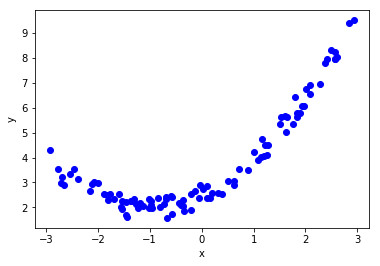

In [4]:
plt.plot(X,y,'bo')
plt.xlabel('x')
plt.ylabel('y')

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly =poly_features.fit_transform(X)# generates the second degree polynomial i.e. the square of each data point
X[0]

array([1.93783594])

In [6]:
X_poly[0]

array([1.93783594, 3.75520813])

In [7]:
X.shape,X_poly.shape

((100, 1), (100, 2))

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_#out put is very close to our equation


(array([2.49706294]), array([[0.95115021, 0.49576306]]))

In [9]:
##3 sources of model error are bias(wrong assumptions), sensitivity to variance and irreducible error(general noise)

In [10]:
#Ridge Regression-- closed-form solution -cholesky
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.27045962]])

In [11]:
#Ridge-SGD
from  sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

/opt/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.25332813])

In [12]:
#Lasso regression
#tends to completely eliminate the weights of least important features i.e. it automatically performs feature selection
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.2160631])

In [13]:
#OR use SGDRegressor and set penalty to 'l1' to do lasso
sgd_reg=SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.27339899])

In [14]:
# Elastic Net is a mix of both lasso and ridge--combines both their penalty terms
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]]),elastic_net.coef_

(array([5.21706796]), array([0.96675361]))

In [15]:
# note using plain linear regression is not advised  always use one of the regularised versions--ridge,lasso etc
#note penalty is only applied during training not during evaluation.

#A  different way to regularise iterative learning algorithms such as 
#radient Descent is to stop traing as soon as validation error reaches minimum aka 'Early Stopping'
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
            ('poly_features',PolynomialFeatures(degree=90, include_bias=False)),
            ('std_scaler',StandardScaler())])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled =poly_scaler.transform(X_val)

sgd_reg =SGDRegressor(n_iter=1, warm_start=True, penalty=None,learning_rate='constant',eta0=0.0005)

minimum_val_error=float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train) #continues where it left off bcos warm_start=True
    y_val_predict =sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_valpredict,y_val)
    if val_error<minimum_val_error:
        minimum_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

NameError: name 'X_train' is not defined

In [16]:
#Logistic regression
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [17]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
X=iris['data'][:,3:] # petal width
y=(iris['target']==2).astype(np.int) #1 if iris-virginica, else 0

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg =LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

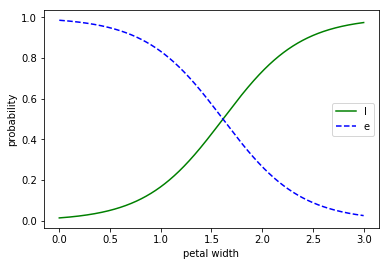

In [20]:
#lets look at the models estimated probabilities for flowers with petal widths varying from 0 to 3 cm
X_new =np.linspace(0,3,1000).reshape(-1,1)
y_proba =log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label='iris-virginica')
plt.plot(X_new,y_proba[:,0], 'b--', label='Not Iris-virginica')
plt.xlabel('petal width')
plt.ylabel('probability')
plt.legend('left')

In [21]:
y_proba

array([[0.98552764, 0.01447236],
       [0.98541511, 0.01458489],
       [0.98530171, 0.01469829],
       ...,
       [0.02620686, 0.97379314],
       [0.02600703, 0.97399297],
       [0.02580868, 0.97419132]])

In [23]:
# logistic regression can also be ragularised by adding l1 or l2 penalties. scikit adds l2 by default.

In [25]:
iris['data'].shape

(150, 4)